# Applying k-means on the given dataset

In [29]:
#import required libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
#loading a dataset
income=pd.read_csv('income.csv')

In [5]:
#checking above 10 entries of given dataset
income.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [10]:
# checking datatype of various features and  no. of columns and presence of null -values in the dataset
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [7]:
#checking mean,std.error,min,max and different percentile of given dataset
income.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,22.0,34.818182,5.901060,26.0,29.0,36.5,39.75,43.0
Income($),22.0,90431.818182,43505.964412,45000.0,58500.0,67500.0,135250.00,162000.0


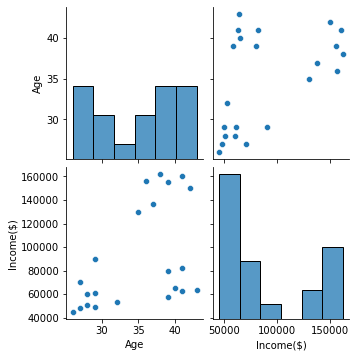

In [9]:
#checking relationship between features viz.age and income of given dataset 
sns.pairplot(income)

In [11]:
#droping column 'Name' from the dataset as it is not an important feature for calculating k-means.
df=income.drop('Name',axis=1)

In [17]:
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [16]:
#Scaling the given dataset as it helps to normalize the data in particulaar range 
scaler = MinMaxScaler()
scaler.fit(df)
X=scaler.transform(df)


#Using k-means from scikit learn library

In [18]:
from sklearn.cluster import KMeans

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k)#making cluster from given dataset
y_pred = kmeans.fit_predict(X)

In [19]:
#y_pred predict the label for all the points
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [20]:
#retrieving co-ordinaates of centroids of cluster
kmeans.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.82352941, 0.95512821],
       [0.58823529, 0.82051282]])

#Visualizating clusters

In [27]:
#creating dataframe of name clusters where we will add new column label which consist of cluster labels,assigned by k-means,for visualization purpose
clusters = pd.DataFrame(X,columns=df.columns)
clusters['label'] = kmeans.labels_

In [28]:
clusters

,Age,Income($),label
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2
5,0.764706,0.940171,2
6,0.882353,0.982906,2
7,0.705882,1.000000,2
8,0.588235,0.948718,3
9,0.529412,0.726496,3


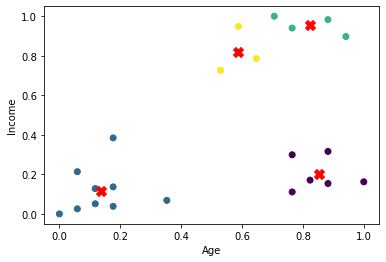

In [32]:
#Function for visualizing differnt cluster made from given dataset
def viz_clusters(kmeans):
    plt.scatter(clusters['Age'], clusters['Income($)'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                color="red",
                marker="X",
                s=100)
    plt.xlabel('Age')
    plt.ylabel('Income')
    
viz_clusters(kmeans)

In [33]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=0)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', n_init=1, random_state=0)

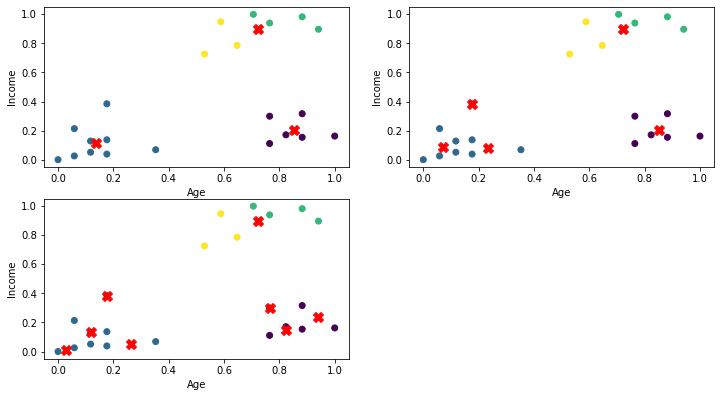

In [34]:
#plotting data for each iteration (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html)
plt.figure(figsize=(12,10))

plt.subplot(321) # nrow=3,ncol=2,index=1(position of graph in the grid get changed)
viz_clusters(kmeans_iter1)

plt.subplot(322)
viz_clusters(kmeans_iter2)

plt.subplot(323)
viz_clusters(kmeans_iter3)

In [35]:
kmeans_iter1.inertia_

0.4750783498553096

In [36]:
kmeans_iter2.inertia_

0.3414992735609068

In [37]:
kmeans_iter3.inertia_

0.2660723317830053

In [38]:
#calculating Inertia for checking how well a dataset was clustered for aplying k-means
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\ak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


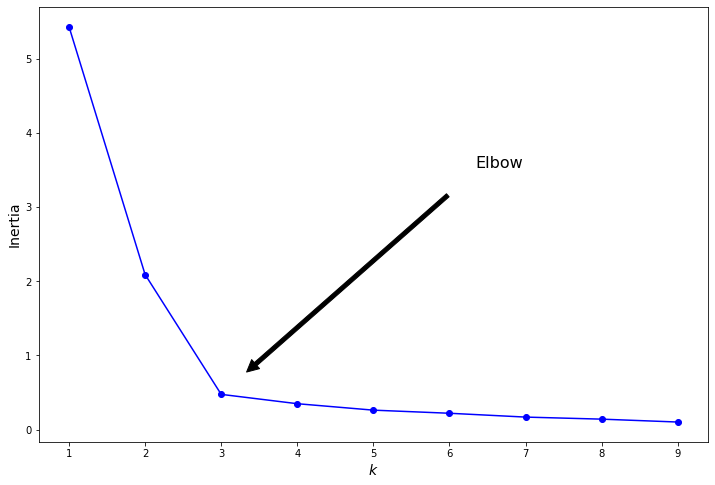

In [39]:
#elbow method- determining optimal no. of clusters in k-means clustering
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [40]:
from sklearn.metrics import silhouette_score

## silhouette score for 4 clusters determine how similar datappoint of one cluster compared to other
silhouette_score(X, kmeans.labels_)

0.625655419231276

In [41]:
## plot for different values of K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

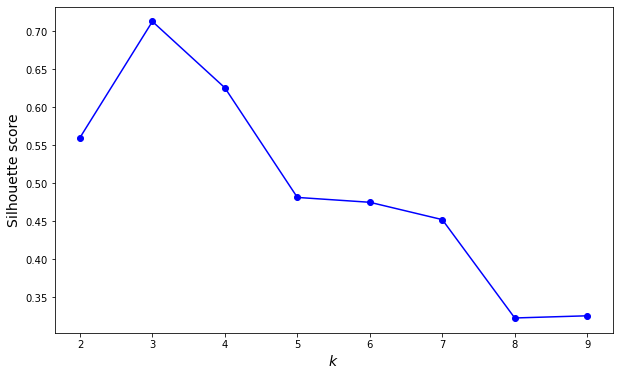

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()